In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import pandas as pd
import matplotlib.pyplot as plt

2022-04-25 11:14:16.818598: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-25 11:14:16.818637: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import time

In [3]:
start1 = time.time()

dvar_max = tf.constant(np.load('/data/user/boiger_r/aerosol/aerosol_code1/helper_functions/MIE_NN/dvar_max_10k.npy'))
dvar_min = tf.constant(np.load('/data/user/boiger_r/aerosol/aerosol_code1/helper_functions/MIE_NN/dvar_min_10k.npy'))
qoi_max = tf.constant(np.load('/data/user/boiger_r/aerosol/aerosol_code1/helper_functions/MIE_NN/qoi_max_10k.npy'))
qoi_min = tf.constant(np.load('/data/user/boiger_r/aerosol/aerosol_code1/helper_functions/MIE_NN/qoi_min_10k.npy'))


end1 = time.time()
time1 = end1-start1
time1

2022-04-25 11:14:19.332360: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-25 11:14:19.332409: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-25 11:14:19.332453: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (merlin-c-105.psi.ch): /proc/driver/nvidia/version does not exist
2022-04-25 11:14:19.332919: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.009638309478759766

In [4]:
from MIE_NN.MieTFNew_RB import *

0.35056352615356445


In [5]:
data_dir = '/data/project/general/aerosolretriev/aerosol_data/raw_data'
datafile = pd.read_csv(f'{data_dir}/GRASP_LHS_rand_paremeters.csv')

In [6]:
datafile = datafile.drop(['Unnamed: 0','Unnamed: 0.1', 'n_450nm','n_630nm','k_450nm','k_630nm'],axis = 1)

In [7]:
datafile

data = pd.DataFrame()

data['m'] = datafile['n_532nm']+1j*datafile['k_532nm']
data['Vtot'] = datafile['V_tot']
data['sigma'] = datafile['GSD']
data['rmean'] = datafile['R_median']*1000



In [8]:
data

m         Vtot     sigma        rmean
0      1.387719+0.102452j  2522.546202  1.410439  1243.261226
1      1.335245+0.040901j  1199.644483  1.444422  1704.574857
2      1.579453+0.029438j   595.333473  1.441406   740.119661
3      1.589408+0.096449j  3270.797847  1.447874  1480.369519
4      1.590546+0.011451j  1447.974248  1.446380  2008.488905
...                   ...          ...       ...          ...
99995  1.338019+0.021043j  2337.776638  1.414590  2363.071014
99996  1.362865+0.056147j   279.584264  1.405972  1526.747380
99997  1.555863+0.134294j  1904.489928  1.441759  2010.671838
99998  1.586190+0.059017j  3820.837785  1.412680  1202.602538
99999  1.439446+0.067187j  1784.949960  1.412486  2061.927651

[100000 rows x 4 columns]

In [9]:
data.iloc[0].values

array([1.38771902e+00+0.10245206j, 2.52254620e+03+0.j        ,
       1.41043905e+00+0.j        , 1.24326123e+03+0.j        ])

0.3445775508880615


In [19]:
total_time = list()
cast = list()
D_n = list()
Factor = list()
anbn = list()
S1S2 = list()
S11_t = list()
integration = list()
for i in range(1000):
    TFE = get_TFEnsembleP11()
    S11,timing = TFE(data.iloc[i].values[0],data.iloc[i].values[1],data.iloc[i].values[2],data.iloc[i].values[3])
    timing1 = np.array(timing)
    total_time.append(timing1[0])
    cast.append(timing1[1])
    D_n.append(timing1[2])
    Factor.append(timing1[3])
    anbn.append(timing1[4])
    S1S2.append(timing1[5])
    S11_t.append(timing1[6])
    integration.append(timing1[7])
    print('**************')

0.34046053886413574
cast 0.0012505054473876953
D_n 0.6877543926239014
Factor 0.0053005218505859375
an,bn 0.008491039276123047
S1,S2 0.005728960037231445
S_11 0.0031778812408447266
integration 0.21703219413757324
0.9294428825378418
**************
0.3371248245239258
cast 0.0012159347534179688
D_n 0.6811385154724121
Factor 0.006115436553955078
an,bn 0.007470130920410156
S1,S2 0.0056056976318359375
S_11 0.0030260086059570312
integration 0.016009807586669922
0.7214415073394775
**************
0.34242796897888184
cast 0.0012383460998535156
D_n 0.6905632019042969
Factor 0.005387067794799805
an,bn 0.007866144180297852
S1,S2 0.0057621002197265625
S_11 0.00305938720703125
integration 0.016490697860717773
0.7310500144958496
**************
0.34099578857421875
cast 0.0012826919555664062
D_n 0.6819052696228027
Factor 0.005299806594848633
an,bn 0.007725715637207031
S1,S2 0.0056304931640625
S_11 0.0030829906463623047
integration 0.016276121139526367
0.7218947410583496
**************
0.33780455589294434

**************
0.34146976470947266
cast 0.0012400150299072266
D_n 0.8454399108886719
Factor 0.005273103713989258
an,bn 0.007695436477661133
S1,S2 0.005639314651489258
S_11 0.0029671192169189453
integration 0.016146421432495117
0.8854436874389648
**************
0.33916354179382324
cast 0.0012156963348388672
D_n 0.673323392868042
Factor 0.005059957504272461
an,bn 0.007653236389160156
S1,S2 0.005577564239501953
S_11 0.003016233444213867
integration 0.015862464904785156
0.7125849723815918
**************
0.33956003189086914
cast 0.0011870861053466797
D_n 0.6851639747619629
Factor 0.0050966739654541016
an,bn 0.007682323455810547
S1,S2 0.005765438079833984
S_11 0.0030913352966308594
integration 0.015987157821655273
0.7250766754150391
**************
0.3392915725708008
cast 0.0012180805206298828
D_n 0.6782863140106201
Factor 0.005048513412475586
an,bn 0.007645606994628906
S1,S2 0.005542755126953125
S_11 0.0030167102813720703
integration 0.015747785568237305
0.717409610748291
**************
0.33

**************
0.33915233612060547
cast 0.001196146011352539
D_n 0.6723175048828125
Factor 0.004872798919677734
an,bn 0.007357597351074219
S1,S2 0.005374908447265625
S_11 0.0029027462005615234
integration 0.015179872512817383
0.7102200984954834
**************
0.3377726078033447
cast 0.0012233257293701172
D_n 0.6821448802947998
Factor 0.0052340030670166016
an,bn 0.007632732391357422
S1,S2 0.005518674850463867
S_11 0.003022432327270508
integration 0.015703201293945312
0.7211358547210693
**************
0.3400909900665283
cast 0.001363992691040039
D_n 0.6785686016082764
Factor 0.005148649215698242
an,bn 0.007607698440551758
S1,S2 0.005656719207763672
S_11 0.00302886962890625
integration 0.015934228897094727
0.7182514667510986
**************
0.33829832077026367
cast 0.0012273788452148438
D_n 0.684938907623291
Factor 0.005032777786254883
an,bn 0.007605075836181641
S1,S2 0.005559682846069336
S_11 0.00301361083984375
integration 0.015875577926635742
0.7241029739379883
**************
0.33956384

**************
0.3401660919189453
cast 0.0012445449829101562
D_n 0.6760818958282471
Factor 0.004832267761230469
an,bn 0.007373332977294922
S1,S2 0.005298614501953125
S_11 0.0028870105743408203
integration 0.015280485153198242
0.7138175964355469
**************
0.3372931480407715
cast 0.0011966228485107422
D_n 0.6796095371246338
Factor 0.00512242317199707
an,bn 0.007699251174926758
S1,S2 0.005644798278808594
S_11 0.0030679702758789062
integration 0.016056060791015625
0.719287633895874
**************
0.33889317512512207
cast 0.00119781494140625
D_n 0.8651278018951416
Factor 0.005057334899902344
an,bn 0.0074808597564697266
S1,S2 0.00529789924621582
S_11 0.0029604434967041016
integration 0.015759944915771484
0.9041018486022949
**************
0.3384544849395752
cast 0.0013244152069091797
D_n 0.6894626617431641
Factor 0.005249977111816406
an,bn 0.0078067779541015625
S1,S2 0.005724668502807617
S_11 0.0030612945556640625
integration 0.016112089157104492
0.7294204235076904
**************
0.34015

**************
0.3387885093688965
cast 0.0012137889862060547
D_n 0.8712036609649658
Factor 0.005162715911865234
an,bn 0.007700681686401367
S1,S2 0.005481719970703125
S_11 0.0030422210693359375
integration 0.01587677001953125
0.9107391834259033
**************
0.33928561210632324
cast 0.001215219497680664
D_n 0.6869597434997559
Factor 0.005177736282348633
an,bn 0.007693767547607422
S1,S2 0.005749940872192383
S_11 0.003078937530517578
integration 0.016057491302490234
0.7268164157867432
**************
0.3397681713104248
cast 0.0012388229370117188
D_n 0.6887249946594238
Factor 0.00516200065612793
an,bn 0.007725954055786133
S1,S2 0.005780220031738281
S_11 0.0030846595764160156
integration 0.016153335571289062
0.7287411689758301
**************
0.3377549648284912
cast 0.001191854476928711
D_n 0.686356782913208
Factor 0.005186557769775391
an,bn 0.007798671722412109
S1,S2 0.0057048797607421875
S_11 0.0030448436737060547
integration 0.016068220138549805
0.7263915538787842
**************
0.3391075

**************
0.34151172637939453
cast 0.0012145042419433594
D_n 0.8381812572479248
Factor 0.0050394535064697266
an,bn 0.007623195648193359
S1,S2 0.005578041076660156
S_11 0.0037860870361328125
integration 0.015750885009765625
0.877821683883667
**************
0.3391604423522949
cast 0.0012531280517578125
D_n 0.67362380027771
Factor 0.0048296451568603516
an,bn 0.007590055465698242
S1,S2 0.005524396896362305
S_11 0.0030088424682617188
integration 0.015573263168334961
0.7122461795806885
**************
0.3375077247619629
cast 0.0011818408966064453
D_n 0.6677148342132568
Factor 0.0048029422760009766
an,bn 0.0075588226318359375
S1,S2 0.0055310726165771484
S_11 0.003003835678100586
integration 0.015569925308227539
0.7062118053436279
**************
0.33677101135253906
cast 0.0013027191162109375
D_n 0.6819040775299072
Factor 0.004985809326171875
an,bn 0.007775068283081055
S1,S2 0.0056798458099365234
S_11 0.0030677318572998047
integration 0.016041994094848633
0.7214055061340332
**************
0

**************
0.3413422107696533
cast 0.0011882781982421875
D_n 0.6589696407318115
Factor 0.0047283172607421875
an,bn 0.007318973541259766
S1,S2 0.005448579788208008
S_11 0.002908468246459961
integration 0.015159845352172852
0.6965405941009521
**************
0.33858275413513184
cast 0.0012347698211669922
D_n 0.6810019016265869
Factor 0.005043983459472656
an,bn 0.00785374641418457
S1,S2 0.0056231021881103516
S_11 0.003056049346923828
integration 0.01580190658569336
0.7203788757324219
**************
0.34053492546081543
cast 0.0012011528015136719
D_n 0.8199622631072998
Factor 0.004965782165527344
an,bn 0.007632255554199219
S1,S2 0.00547480583190918
S_11 0.002960681915283203
integration 0.015293121337890625
0.8583345413208008
**************
0.3365473747253418
cast 0.0011925697326660156
D_n 0.6707017421722412
Factor 0.0048639774322509766
an,bn 0.007516622543334961
S1,S2 0.005638837814331055
S_11 0.003008604049682617
integration 0.01555943489074707
0.7093222141265869
**************
0.338550

**************
0.34041810035705566
cast 0.0011794567108154297
D_n 0.6896772384643555
Factor 0.0050792694091796875
an,bn 0.007741451263427734
S1,S2 0.005809307098388672
S_11 0.0030853748321533203
integration 0.016312360763549805
0.7295637130737305
**************
0.3358945846557617
cast 0.0011608600616455078
D_n 0.6642377376556396
Factor 0.005051136016845703
an,bn 0.0076792240142822266
S1,S2 0.005586385726928711
S_11 0.0030601024627685547
integration 0.015816211700439453
0.7034990787506104
**************
0.3384976387023926
cast 0.0012590885162353516
D_n 0.8277461528778076
Factor 0.005010366439819336
an,bn 0.00764155387878418
S1,S2 0.006368875503540039
S_11 0.0030527114868164062
integration 0.01580023765563965
0.8675308227539062
**************
0.3370497226715088
cast 0.0011992454528808594
D_n 0.6683700084686279
Factor 0.004923105239868164
an,bn 0.007603168487548828
S1,S2 0.005522012710571289
S_11 0.0030057430267333984
integration 0.015539884567260742
0.7068080902099609
**************
0.34

**************
0.3392164707183838
cast 0.0011866092681884766
D_n 0.8240175247192383
Factor 0.005101442337036133
an,bn 0.007756948471069336
S1,S2 0.00564885139465332
S_11 0.0030243396759033203
integration 0.01584625244140625
0.8632256984710693
**************
0.3392460346221924
cast 0.0011830329895019531
D_n 0.6706252098083496
Factor 0.005148410797119141
an,bn 0.00770115852355957
S1,S2 0.005591630935668945
S_11 0.003046751022338867
integration 0.01591205596923828
0.7102949619293213
**************
0.3382401466369629
cast 0.0011892318725585938
D_n 0.6791443824768066
Factor 0.0048770904541015625
an,bn 0.007630586624145508
S1,S2 0.005720853805541992
S_11 0.0030341148376464844
integration 0.01580071449279785
0.7182369232177734
**************
0.33878612518310547
cast 0.0013415813446044922
D_n 0.6822390556335449
Factor 0.004838228225708008
an,bn 0.007650852203369141
S1,S2 0.005559444427490234
S_11 0.0030438899993896484
integration 0.0157623291015625
0.7212989330291748
**************
0.338330030

**************
0.3376014232635498
cast 0.001195669174194336
D_n 0.663891077041626
Factor 0.004775047302246094
an,bn 0.0074999332427978516
S1,S2 0.005592823028564453
S_11 0.0029947757720947266
integration 0.015495538711547852
0.7022509574890137
**************
0.335568904876709
cast 0.0011899471282958984
D_n 0.6647059917449951
Factor 0.00485682487487793
an,bn 0.0076901912689208984
S1,S2 0.00552821159362793
S_11 0.0029959678649902344
integration 0.015500545501708984
0.703106164932251
**************
0.33783864974975586
cast 0.0011835098266601562
D_n 0.665349006652832
Factor 0.004869937896728516
an,bn 0.007534980773925781
S1,S2 0.005589008331298828
S_11 0.003004312515258789
integration 0.015517473220825195
0.7036809921264648
**************
0.3363504409790039
cast 0.0011935234069824219
D_n 0.6644589900970459
Factor 0.004831552505493164
an,bn 0.007605552673339844
S1,S2 0.0055582523345947266
S_11 0.0030014514923095703
integration 0.015689611434936523
0.7029783725738525
**************
0.3389098

**************
0.3368110656738281
cast 0.0011930465698242188
D_n 0.6641943454742432
Factor 0.004836320877075195
an,bn 0.0076105594635009766
S1,S2 0.0055119991302490234
S_11 0.002999544143676758
integration 0.015541315078735352
0.702517032623291
**************
0.3356761932373047
cast 0.001207590103149414
D_n 0.6628322601318359
Factor 0.00482940673828125
an,bn 0.007654905319213867
S1,S2 0.005555868148803711
S_11 0.003006458282470703
integration 0.015537261962890625
0.7012555599212646
**************
0.3384401798248291
cast 0.0011942386627197266
D_n 0.7993104457855225
Factor 0.0046651363372802734
an,bn 0.00739288330078125
S1,S2 0.0053863525390625
S_11 0.0029256343841552734
integration 0.015237569808959961
0.8370997905731201
**************
0.3357267379760742
cast 0.0013244152069091797
D_n 0.662743330001831
Factor 0.004859209060668945
an,bn 0.007569789886474609
S1,S2 0.005507230758666992
S_11 0.0030083656311035156
integration 0.015563488006591797
0.7012109756469727
**************
0.338662147

**************
0.33754968643188477
cast 0.0012192726135253906
D_n 0.8033664226531982
Factor 0.004782438278198242
an,bn 0.007525444030761719
S1,S2 0.005407810211181641
S_11 0.002937793731689453
integration 0.015558719635009766
0.8415932655334473
**************
0.3381338119506836
cast 0.0014808177947998047
D_n 0.6668076515197754
Factor 0.004853010177612305
an,bn 0.007509708404541016
S1,S2 0.005594730377197266
S_11 0.0030052661895751953
integration 0.01559758186340332
0.705493688583374
**************
0.33805251121520996
cast 0.0011951923370361328
D_n 0.6644916534423828
Factor 0.004858732223510742
an,bn 0.007526397705078125
S1,S2 0.005608320236206055
S_11 0.003016233444213867
integration 0.015389204025268555
0.7028689384460449
**************
0.33685994148254395
cast 0.0012097358703613281
D_n 0.6644480228424072
Factor 0.004849433898925781
an,bn 0.007829427719116211
S1,S2 0.005655765533447266
S_11 0.0030035972595214844
integration 0.015472412109375
0.703127384185791
**************
0.33799886

**************
0.3384084701538086
cast 0.0011568069458007812
D_n 0.8183190822601318
Factor 0.00479578971862793
an,bn 0.007395505905151367
S1,S2 0.005421638488769531
S_11 0.0035181045532226562
integration 0.015253067016601562
0.8564894199371338
**************
0.33555078506469727
cast 0.0011730194091796875
D_n 0.6515834331512451
Factor 0.004765987396240234
an,bn 0.007429838180541992
S1,S2 0.005435466766357422
S_11 0.002955913543701172
integration 0.015333414077758789
0.689295768737793
**************
0.337099552154541
cast 0.0011475086212158203
D_n 0.6526625156402588
Factor 0.0046651363372802734
an,bn 0.007433652877807617
S1,S2 0.0054852962493896484
S_11 0.002956867218017578
integration 0.01533961296081543
0.6905028820037842
**************
0.3355686664581299
cast 0.0011630058288574219
D_n 0.6511509418487549
Factor 0.004601955413818359
an,bn 0.007477283477783203
S1,S2 0.0055119991302490234
S_11 0.0029611587524414062
integration 0.015365839004516602
0.6888742446899414
**************
0.33691

**************
0.3374154567718506
cast 0.0011539459228515625
D_n 0.6516475677490234
Factor 0.004759550094604492
an,bn 0.007379770278930664
S1,S2 0.005491733551025391
S_11 0.002976655960083008
integration 0.015272855758666992
0.6893062591552734
**************
0.33609652519226074
cast 0.0011758804321289062
D_n 0.6488895416259766
Factor 0.0045888423919677734
an,bn 0.0072743892669677734
S1,S2 0.005314826965332031
S_11 0.002888202667236328
integration 0.015004634857177734
0.6859469413757324
**************
0.3384683132171631
cast 0.0011966228485107422
D_n 0.8011035919189453
Factor 0.004849672317504883
an,bn 0.007468223571777344
S1,S2 0.0054395198822021484
S_11 0.002952098846435547
integration 0.015384912490844727
0.8390367031097412
**************
0.33551549911499023
cast 0.0011303424835205078
D_n 0.6391582489013672
Factor 0.004674196243286133
an,bn 0.007220745086669922
S1,S2 0.005383968353271484
S_11 0.0028808116912841797
integration 0.014980792999267578
0.676032543182373
**************
0.33

**************
0.3379635810852051
cast 0.0011508464813232422
D_n 0.6538052558898926
Factor 0.004875659942626953
an,bn 0.007425785064697266
S1,S2 0.005509614944458008
S_11 0.0029785633087158203
integration 0.015297412872314453
0.6916837692260742
**************
0.33512377738952637
cast 0.0011620521545410156
D_n 0.6529445648193359
Factor 0.0048563480377197266
an,bn 0.007458686828613281
S1,S2 0.00542902946472168
S_11 0.002967357635498047
integration 0.015313863754272461
0.6907567977905273
**************
0.3380711078643799
cast 0.001173257827758789
D_n 0.7954103946685791
Factor 0.004794597625732422
an,bn 0.0073909759521484375
S1,S2 0.005427360534667969
S_11 0.0035448074340820312
integration 0.015358686447143555
0.8337259292602539
**************
0.3360481262207031
cast 0.0011594295501708984
D_n 0.6517248153686523
Factor 0.004769086837768555
an,bn 0.007467746734619141
S1,S2 0.005429744720458984
S_11 0.002955913543701172
integration 0.015277385711669922
0.6893963813781738
**************
0.3369

**************
0.33857154846191406
cast 0.0011725425720214844
D_n 0.7951822280883789
Factor 0.004800081253051758
an,bn 0.007388114929199219
S1,S2 0.005429744720458984
S_11 0.0029480457305908203
integration 0.01532435417175293
0.8330626487731934
**************
0.3356916904449463
cast 0.0011560916900634766
D_n 0.657109260559082
Factor 0.004690885543823242
an,bn 0.0074346065521240234
S1,S2 0.00540471076965332
S_11 0.0029366016387939453
integration 0.015427350997924805
0.6949844360351562
**************
0.3373432159423828
cast 0.0011734962463378906
D_n 0.6529293060302734
Factor 0.004678964614868164
an,bn 0.0075626373291015625
S1,S2 0.0055980682373046875
S_11 0.0030221939086914062
integration 0.015326499938964844
0.6911041736602783
**************
0.33661794662475586
cast 0.001199960708618164
D_n 0.653942346572876
Factor 0.004584312438964844
an,bn 0.00744175910949707
S1,S2 0.0054585933685302734
S_11 0.0029807090759277344
integration 0.015477895736694336
0.6918575763702393
**************
0.338

**************
0.33759450912475586
cast 0.0011484622955322266
D_n 0.6501049995422363
Factor 0.004738330841064453
an,bn 0.00734710693359375
S1,S2 0.0054738521575927734
S_11 0.0029137134552001953
integration 0.015194416046142578
0.6876442432403564
**************
0.3352842330932617
cast 0.001165151596069336
D_n 0.6504940986633301
Factor 0.0047304630279541016
an,bn 0.007389545440673828
S1,S2 0.00539398193359375
S_11 0.0029261112213134766
integration 0.015170097351074219
0.6879007816314697
**************
0.340242862701416
cast 0.0011756420135498047
D_n 0.6503798961639404
Factor 0.004771709442138672
an,bn 0.0073812007904052734
S1,S2 0.005489349365234375
S_11 0.002936124801635742
integration 0.015223026275634766
0.6879801750183105
**************
0.33842992782592773
cast 0.001165628433227539
D_n 0.6497080326080322
Factor 0.004734516143798828
an,bn 0.0074062347412109375
S1,S2 0.00539398193359375
S_11 0.002924680709838867
integration 0.01519775390625
0.6871483325958252
**************
0.341865301

**************
0.33893537521362305
cast 0.001148223876953125
D_n 0.6459810733795166
Factor 0.004713773727416992
an,bn 0.007363080978393555
S1,S2 0.0053670406341552734
S_11 0.0029103755950927734
integration 0.015163898468017578
0.6832654476165771
**************
0.33817076683044434
cast 0.0012476444244384766
D_n 0.6728551387786865
Factor 0.004435062408447266
an,bn 0.007371187210083008
S1,S2 0.005380153656005859
S_11 0.0029175281524658203
integration 0.015156030654907227
0.7102725505828857
**************
0.3373396396636963
cast 0.0011560916900634766
D_n 0.7801320552825928
Factor 0.004725456237792969
an,bn 0.007409095764160156
S1,S2 0.005362510681152344
S_11 0.002918720245361328
integration 0.01520681381225586
0.8175537586212158
**************
0.3357274532318115
cast 0.001134634017944336
D_n 0.6461803913116455
Factor 0.00469970703125
an,bn 0.007344961166381836
S1,S2 0.005368709564208984
S_11 0.002914905548095703
integration 0.015071392059326172
0.6833341121673584
**************
0.337217807

**************
0.33660006523132324
cast 0.0011386871337890625
D_n 0.753502607345581
Factor 0.0045626163482666016
an,bn 0.006891489028930664
S1,S2 0.005105018615722656
S_11 0.0027322769165039062
integration 0.014177322387695312
0.7887153625488281
**************
0.33478569984436035
cast 0.0011589527130126953
D_n 0.641089677810669
Factor 0.004610776901245117
an,bn 0.007118701934814453
S1,S2 0.005312919616699219
S_11 0.002844095230102539
integration 0.014760732650756836
0.677509069442749
**************
0.33846521377563477
cast 0.0011639595031738281
D_n 0.6473257541656494
Factor 0.004605770111083984
an,bn 0.007264137268066406
S1,S2 0.0054264068603515625
S_11 0.0029201507568359375
integration 0.01507568359375
0.6845741271972656
**************
0.3361082077026367
cast 0.0011532306671142578
D_n 0.6511118412017822
Factor 0.004717111587524414
an,bn 0.007559776306152344
S1,S2 0.0055141448974609375
S_11 0.002922534942626953
integration 0.015116691589355469
0.6887226104736328
**************
0.337066

**************
0.3359982967376709
cast 0.0011286735534667969
D_n 0.7946803569793701
Factor 0.004630327224731445
an,bn 0.007131099700927734
S1,S2 0.005242347717285156
S_11 0.003415822982788086
integration 0.014779329299926758
0.8316164016723633
**************
0.33661937713623047
cast 0.001157522201538086
D_n 0.6459043025970459
Factor 0.005176544189453125
an,bn 0.007688760757446289
S1,S2 0.005372285842895508
S_11 0.0029125213623046875
integration 0.015188932418823242
0.6840305328369141
**************
0.33788132667541504
cast 0.0011587142944335938
D_n 0.6462883949279785
Factor 0.004621744155883789
an,bn 0.007384300231933594
S1,S2 0.005369663238525391
S_11 0.0029168128967285156
integration 0.015136003494262695
0.6836578845977783
**************
0.3363487720489502
cast 0.001157522201538086
D_n 0.6472680568695068
Factor 0.00471186637878418
an,bn 0.007382869720458984
S1,S2 0.005376577377319336
S_11 0.0029256343841552734
integration 0.015145063400268555
0.6845917701721191
**************
0.33885

**************
0.337923526763916
cast 0.0011544227600097656
D_n 0.6468019485473633
Factor 0.004710197448730469
an,bn 0.007297039031982422
S1,S2 0.0054242610931396484
S_11 0.0029144287109375
integration 0.015075206756591797
0.6839962005615234
**************
0.33806347846984863
cast 0.0012350082397460938
D_n 0.6538097858428955
Factor 0.004700183868408203
an,bn 0.0075092315673828125
S1,S2 0.005362033843994141
S_11 0.0029184818267822266
integration 0.015096902847290039
0.6912610530853271
**************
0.3383142948150635
cast 0.0012485980987548828
D_n 0.7907049655914307
Factor 0.00464630126953125
an,bn 0.00734400749206543
S1,S2 0.005373239517211914
S_11 0.002926349639892578
integration 0.015304803848266602
0.8283538818359375
**************
0.33533406257629395
cast 0.0011429786682128906
D_n 0.6469895839691162
Factor 0.004740238189697266
an,bn 0.007317543029785156
S1,S2 0.005457878112792969
S_11 0.0029180049896240234
integration 0.015128374099731445
0.6843154430389404
**************
0.338461

**************
0.33739161491394043
cast 0.0011718273162841797
D_n 0.6376111507415771
Factor 0.004433870315551758
an,bn 0.007127046585083008
S1,S2 0.005311250686645508
S_11 0.0028531551361083984
integration 0.01488041877746582
0.6741726398468018
**************
0.33547377586364746
cast 0.0011513233184814453
D_n 0.6478257179260254
Factor 0.004736423492431641
an,bn 0.007371425628662109
S1,S2 0.005381584167480469
S_11 0.0029256343841552734
integration 0.015148639678955078
0.6851663589477539
**************
0.33722925186157227
cast 0.0011546611785888672
D_n 0.7885456085205078
Factor 0.004747629165649414
an,bn 0.0073239803314208984
S1,S2 0.005385637283325195
S_11 0.0034890174865722656
integration 0.015137672424316406
0.826404333114624
**************
0.3385598659515381
cast 0.0011277198791503906
D_n 0.6092619895935059
Factor 0.0043375492095947266
an,bn 0.006900310516357422
S1,S2 0.005005359649658203
S_11 0.0027213096618652344
integration 0.014111995697021484
0.6441614627838135
**************
0.

**************
0.3366546630859375
cast 0.0011649131774902344
D_n 0.7824885845184326
Factor 0.0047376155853271484
an,bn 0.007169961929321289
S1,S2 0.005362749099731445
S_11 0.002920389175415039
integration 0.015210151672363281
0.8198726177215576
**************
0.338484525680542
cast 0.0011477470397949219
D_n 0.6466591358184814
Factor 0.004590749740600586
an,bn 0.007258176803588867
S1,S2 0.005261421203613281
S_11 0.002859354019165039
integration 0.014885902404785156
0.6833038330078125
**************
0.33747148513793945
cast 0.0011398792266845703
D_n 0.6460480690002441
Factor 0.00472259521484375
an,bn 0.007342100143432617
S1,S2 0.005447864532470703
S_11 0.0029222965240478516
integration 0.015115976333618164
0.6833667755126953
**************
0.3353426456451416
cast 0.0011587142944335938
D_n 0.6463251113891602
Factor 0.004381656646728516
an,bn 0.007347583770751953
S1,S2 0.005349636077880859
S_11 0.002919912338256836
integration 0.015103816986083984
0.6832091808319092
**************
0.336407

**************
0.3386094570159912
cast 0.0011472702026367188
D_n 0.6331155300140381
Factor 0.004424571990966797
an,bn 0.00686335563659668
S1,S2 0.0051310062408447266
S_11 0.0027267932891845703
integration 0.014154672622680664
0.668156623840332
**************
0.33591485023498535
cast 0.0013043880462646484
D_n 0.6462781429290771
Factor 0.004708290100097656
an,bn 0.007378339767456055
S1,S2 0.0053637027740478516
S_11 0.0029180049896240234
integration 0.015079259872436523
0.6836624145507812
**************
0.33789777755737305
cast 0.0011429786682128906
D_n 0.6376967430114746
Factor 0.004300832748413086
an,bn 0.007123231887817383
S1,S2 0.005362033843994141
S_11 0.0030274391174316406
integration 0.014780759811401367
0.674203634262085
**************
0.335862398147583
cast 0.0011680126190185547
D_n 0.6461331844329834
Factor 0.0047109127044677734
an,bn 0.0073699951171875
S1,S2 0.005351543426513672
S_11 0.002914905548095703
integration 0.015202045440673828
0.6834681034088135
**************
0.33820

**************
0.33841776847839355
cast 0.0011420249938964844
D_n 0.6460413932800293
Factor 0.0047283172607421875
an,bn 0.007370471954345703
S1,S2 0.005362749099731445
S_11 0.002920389175415039
integration 0.015167713165283203
0.6833581924438477
**************
0.3364531993865967
cast 0.001163482666015625
D_n 0.6464502811431885
Factor 0.004662513732910156
an,bn 0.0073986053466796875
S1,S2 0.005362987518310547
S_11 0.0029206275939941406
integration 0.015184879302978516
0.6837899684906006
**************
0.3373565673828125
cast 0.0011782646179199219
D_n 0.7855942249298096
Factor 0.004623889923095703
an,bn 0.0072858333587646484
S1,S2 0.005372762680053711
S_11 0.0029115676879882812
integration 0.015238761901855469
0.8230245113372803
**************
0.33536458015441895
cast 0.0011601448059082031
D_n 0.6462686061859131
Factor 0.00471949577331543
an,bn 0.007371187210083008
S1,S2 0.005372524261474609
S_11 0.002921581268310547
integration 0.015073060989379883
0.6835124492645264
**************
0.33

**************
0.3420114517211914
cast 0.0012569427490234375
D_n 0.7932877540588379
Factor 0.004656791687011719
an,bn 0.007439374923706055
S1,S2 0.005364179611206055
S_11 0.0030193328857421875
integration 0.015429496765136719
0.8312959671020508
**************
0.33752942085266113
cast 0.0011665821075439453
D_n 0.6466057300567627
Factor 0.004747152328491211
an,bn 0.007311105728149414
S1,S2 0.00543212890625
S_11 0.0029249191284179688
integration 0.015104293823242188
0.6839151382446289
**************
0.33705639839172363
cast 0.0011584758758544922
D_n 0.6476142406463623
Factor 0.004731893539428711
an,bn 0.0072803497314453125
S1,S2 0.0054514408111572266
S_11 0.0028111934661865234
integration 0.015106916427612305
0.6849219799041748
**************
0.33611059188842773
cast 0.0011432170867919922
D_n 0.6451077461242676
Factor 0.00471186637878418
an,bn 0.007376909255981445
S1,S2 0.005379676818847656
S_11 0.002916097640991211
integration 0.01513814926147461
0.6823909282684326
**************
0.33749

**************
0.33716249465942383
cast 0.0011625289916992188
D_n 0.7922155857086182
Factor 0.004647731781005859
an,bn 0.007265567779541016
S1,S2 0.005354881286621094
S_11 0.0034928321838378906
integration 0.015107870101928711
0.8300566673278809
**************
0.3350198268890381
cast 0.0011484622955322266
D_n 0.6411271095275879
Factor 0.004331350326538086
an,bn 0.006878852844238281
S1,S2 0.005026578903198242
S_11 0.00272369384765625
integration 0.014291048049926758
0.6762969493865967
**************
0.33791184425354004
cast 0.0011730194091796875
D_n 0.6473474502563477
Factor 0.00490117073059082
an,bn 0.007645130157470703
S1,S2 0.005385637283325195
S_11 0.0029342174530029297
integration 0.015307426452636719
0.685352087020874
**************
0.3375382423400879
cast 0.0011551380157470703
D_n 0.6460356712341309
Factor 0.004809141159057617
an,bn 0.007362842559814453
S1,S2 0.005369424819946289
S_11 0.0029315948486328125
integration 0.015164613723754883
0.6834521293640137
**************
0.33886

**************
0.33763766288757324
cast 0.0011365413665771484
D_n 0.6430308818817139
Factor 0.0046956539154052734
an,bn 0.007170677185058594
S1,S2 0.005341291427612305
S_11 0.0028755664825439453
integration 0.014875173568725586
0.6797449588775635
**************
0.3358490467071533
cast 0.0011522769927978516
D_n 0.6469523906707764
Factor 0.00473475456237793
an,bn 0.00739288330078125
S1,S2 0.005393266677856445
S_11 0.002972126007080078
integration 0.015146017074584961
0.6843652725219727
**************
0.33695125579833984
cast 0.0011544227600097656
D_n 0.7742373943328857
Factor 0.004367351531982422
an,bn 0.006863117218017578
S1,S2 0.00503230094909668
S_11 0.002811908721923828
integration 0.014166116714477539
0.80940842628479
**************
0.33655643463134766
cast 0.0012061595916748047
D_n 0.6470234394073486
Factor 0.004725933074951172
an,bn 0.007317543029785156
S1,S2 0.005471229553222656
S_11 0.0029397010803222656
integration 0.015254020690917969
0.684678316116333
**************
0.3388493

**************
0.33708834648132324
cast 0.0011622905731201172
D_n 0.6404933929443359
Factor 0.004631519317626953
an,bn 0.007375001907348633
S1,S2 0.0053408145904541016
S_11 0.0028595924377441406
integration 0.014984607696533203
0.6774778366088867
**************
0.33625125885009766
cast 0.0011501312255859375
D_n 0.6463937759399414
Factor 0.004688739776611328
an,bn 0.007413625717163086
S1,S2 0.005365133285522461
S_11 0.002926349639892578
integration 0.015186071395874023
0.6837694644927979
**************
0.3378920555114746
cast 0.001146554946899414
D_n 0.7881350517272949
Factor 0.004721164703369141
an,bn 0.007285356521606445
S1,S2 0.005366325378417969
S_11 0.0036079883575439453
integration 0.01513814926147461
0.8260371685028076
**************
0.336855411529541
cast 0.0011677742004394531
D_n 0.6450462341308594
Factor 0.004723310470581055
an,bn 0.007370948791503906
S1,S2 0.005358219146728516
S_11 0.002911090850830078
integration 0.015148639678955078
0.6823551654815674
**************
0.33665

**************
0.3377096652984619
cast 0.0011594295501708984
D_n 0.7832529544830322
Factor 0.0047914981842041016
an,bn 0.0073795318603515625
S1,S2 0.005346059799194336
S_11 0.002924680709838867
integration 0.015163183212280273
0.8208475112915039
**************
0.33713674545288086
cast 0.0011398792266845703
D_n 0.6318495273590088
Factor 0.004616737365722656
an,bn 0.0071980953216552734
S1,S2 0.0052487850189208984
S_11 0.002846240997314453
integration 0.015073060989379883
0.6685872077941895
**************
0.3375110626220703
cast 0.0011608600616455078
D_n 0.6391375064849854
Factor 0.004513740539550781
an,bn 0.007129192352294922
S1,S2 0.005327939987182617
S_11 0.0028514862060546875
integration 0.015055418014526367
0.6759605407714844
**************
0.3366990089416504
cast 0.0012125968933105469
D_n 0.6480674743652344
Factor 0.004673480987548828
an,bn 0.0071773529052734375
S1,S2 0.005396127700805664
S_11 0.0029516220092773438
integration 0.01528620719909668
0.6855897903442383
**************
0.

In [20]:
total_time_time = np.mean(total_time)
cast_time = np.mean(cast)
D_n_time = np.mean(D_n)
Factor_time = np.mean(Factor)
anbn_time = np.mean(anbn)
S1S2_time = np.mean(S1S2)
S11_t_time = np.mean(S11_t)
integration_time = np.mean(integration)

In [21]:
print(total_time_time,'(total_time)')
print(cast_time,'cast')
print(D_n_time,'D_n')
print(Factor_time,'Factor')
print(anbn_time,'anbn')
print(S1S2_time,'S1S2')
print(S11_t_time,'S11_t')
print(integration_time,'integration')

0.72700566 (total_time)
0.0011890049 cast
0.68886095 D_n
0.004783276 Factor
0.00743219 anbn
0.00546166 S1S2
0.002995003 S11_t
0.015545454 integration


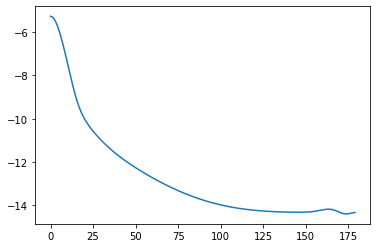

In [13]:
plt.plot(np.log(S11))

In [3]:
from MiePyV2 import *
from MieTFOld import *

2022-04-25 09:02:49.497652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-25 09:02:49.497751: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-25 09:02:49.497788: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (merlin-c-105.psi.ch): /proc/driver/nvidia/version does not exist
2022-04-25 09:02:49.498439: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import time

# Comparison of Numpy version vs Tensorflow version of the package

# Compare Bessel Functions

Import spherical bessel functions from numpy

In [5]:
from scipy.special import spherical_jn, spherical_yn, jv, yv

Create a numpy array with spherical bessel j functions and compare it with the output of the tensorflow spherical bessel j functions.

The BesseljTensor function gives two output-tensors. One tensor with the bessel j functions of order 0-49 and one with orders 1-50 (needed for a_n, b_n calculation where in the formula the index is once shifted by one. using two arrays with shifted entries is an easy way of accounting for this)

The relative error never goes beyond e-04. *Caveat*: The accuracy only needs to hold for orders up to 2 + x + 4$\cdot x^{1/3}$ because this is the upper sum limit. So when using (for example) $x = 5$, values above $\sim 15$ will have bigger and bigger errors, but this is not relevant because these values will not be used for $x = 5$

In [6]:
start1 = time.time()
xtf = tf.constant([35.]) #Use a maximum value of 35
x = 35.
RelevantIndex = tf.cast(2 + xtf + 4*xtf**(1/3), dtype=tf.int32)
RelevantIndex = RelevantIndex[0]

NumpyArrayJ = np.array([spherical_jn(0,x), spherical_jn(1,x),spherical_jn(2,x),spherical_jn(3,x),spherical_jn(4,x),spherical_jn(5,x),spherical_jn(6,x),spherical_jn(7,x),spherical_jn(8,x),spherical_jn(9,x),spherical_jn(10,x),spherical_jn(11,x),spherical_jn(12,x),spherical_jn(13,x),spherical_jn(14,x),spherical_jn(15,x),spherical_jn(16,x),spherical_jn(17,x),spherical_jn(18,x),spherical_jn(19,x),spherical_jn(20,x),spherical_jn(21,x),spherical_jn(22,x),spherical_jn(23,x),spherical_jn(24,x),spherical_jn(25,x),spherical_jn(26,x),spherical_jn(27,x),spherical_jn(28,x),spherical_jn(29,x),spherical_jn(30,x),spherical_jn(31,x),spherical_jn(32,x),spherical_jn(33,x),spherical_jn(34,x),spherical_jn(35,x),spherical_jn(36,x),spherical_jn(37,x),spherical_jn(38,x),spherical_jn(39,x),spherical_jn(40,x),spherical_jn(41,x),spherical_jn(42,x),spherical_jn(43,x),spherical_jn(44,x),spherical_jn(45,x),spherical_jn(46,x),spherical_jn(47,x),spherical_jn(48,x),spherical_jn(49,x),spherical_jn(50,x)])
TFArrayj0, TFArrayj = BesseljTensor(xtf,1)
end1 = time.time()
time1 = start1-end1

NameError: name 'BesseljTensor' is not defined

In [5]:
(NumpyArrayJ[0:RelevantIndex]-TFArrayj0[0:RelevantIndex,0])/NumpyArrayJ[0:RelevantIndex]

<tf.Tensor: shape=(50,), dtype=complex128, numpy=
array([ 0.00000000e+00-0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        0.00000000e+00-0.j,  0.00000000e+00-0.j,  0.00000000e+00+0.j,
        1.39261328e-16+0.j, -3.75237508e-16-0.j,  0.00000000e+00-0.j,
       -3.62960060e-16-0.j,  0.00000000e+00+0.j, -3.37689682e-16+0.j,
        5.43025798e-16+0.j,  2.33826268e-16+0.j,  5.14537539e-16+0.j,
        9.77537010e-16+0.j, -3.59210766e-16+0.j, -4.46292054e-15+0.j,
       -1.66285928e-15-0.j,  4.23842921e-15+0.j, -6.42629825e-16-0.j,
       -5.11416832e-15+0.j,  1.15407240e-14+0.j,  3.02244777e-14+0.j,
       -1.21162399e-11-0.j,  7.85724549e-14+0.j, -5.51542505e-14-0.j,
        3.79833753e-13+0.j, -6.31025385e-13-0.j,  1.82141732e-12+0.j,
        9.82896459e-13+0.j,  7.40777640e-13+0.j,  5.71859247e-13+0.j,
        3.97808880e-13+0.j,  1.65383704e-13+0.j, -2.14559805e-13+0.j,
       -9.29253708e-13+0.j, -2.48330815e-12+0.j, -6.28918201e-12+0.j,
       -1.66644897e-11+0.j, -4.78495727e

Create a numpy array with spherical bessel j functions and compare it with the output of the tensorflow spherical bessel j functions.

The same things apply as mentioned in the j-case above

In [6]:
start2 = time.time()
xtf = tf.constant([3.]) #Use a maximum value of 35
x = 3.
RelevantIndex = tf.cast(2 + xtf + 4*xtf**(1/3), dtype=tf.int32)
RelevantIndex = RelevantIndex[0]
NumpyArrayY = np.array([spherical_yn(0,x), spherical_yn(1,x),spherical_yn(2,x),spherical_yn(3,x),spherical_yn(4,x),spherical_yn(5,x),spherical_yn(6,x),spherical_yn(7,x),spherical_yn(8,x),spherical_yn(9,x),spherical_yn(10,x),spherical_yn(11,x),spherical_yn(12,x),spherical_yn(13,x),spherical_yn(14,x),spherical_yn(15,x),spherical_yn(16,x),spherical_yn(17,x),spherical_yn(18,x),spherical_yn(19,x),spherical_yn(20,x),spherical_yn(21,x),spherical_yn(22,x),spherical_yn(23,x),spherical_yn(24,x),spherical_yn(25,x),spherical_yn(26,x),spherical_yn(27,x),spherical_yn(28,x),spherical_yn(29,x),spherical_yn(30,x),spherical_yn(31,x),spherical_yn(32,x),spherical_yn(33,x),spherical_yn(34,x),spherical_yn(35,x),spherical_yn(36,x),spherical_yn(37,x),spherical_yn(38,x),spherical_yn(39,x),spherical_yn(40,x),spherical_yn(41,x),spherical_yn(42,x),spherical_yn(43,x),spherical_yn(44,x),spherical_yn(45,x),spherical_yn(46,x),spherical_yn(47,x),spherical_yn(48,x),spherical_yn(49,x),spherical_yn(50,x)])
TFArrayy0, TFArrayy = BesselyTensor(xtf,1)
end2 = time.time()
time2 = start2-end2

In [7]:
(NumpyArrayY[1:RelevantIndex]-TFArrayy[0:RelevantIndex-1,0])/NumpyArrayY[1:RelevantIndex]

<tf.Tensor: shape=(9,), dtype=complex128, numpy=
array([-2.20425225e-16+0.j, -2.07877087e-16-0.j,  0.00000000e+00-0.j,
        0.00000000e+00-0.j, -1.97634446e-16-0.j, -2.42647277e-16-0.j,
       -2.41056675e-16-0.j, -2.02925084e-16-0.j, -4.46298747e-16-0.j])>

# Compare $\pi_n$ and $\tau_n$ functions

When comparing the Pi_n and Tau_n functions a few important things need to be considered to interpret these results here correctly.

- The datatype used for the tensorflow code actually changes the values of the result! (which I find a bit weird but can somewhat understand). This is the reason why the values in the comparison sometimes change between being exactly zero (perfect agreement) and being around e-08 oder e-07 (almost perfect agreement). The code is the exact same for both versions but the datatype is what causes these slight differences in relative error.


- In the tensorflow version the sizeparameter is used as input because this is where the upper sum limit is set in a bit of a sneaky way (because in tensorflow I cannot dynamically change the upper limit within a tensor etc.) --> all the entries of the pi- and tau-tensor which are above the nmax for the used sizeparameter are set to zero. this is why after some point the values of the relative error become exactly 1.0, and this is not an indication of the inaccuracy of the code. the nmax is set to 50 because the TF code always outputs 50 pi- and tau- values, just with some of them set to zero.

So just to be clear: the pi- and tau- values are always the same, they _do not_ depend on the size parameter, only on the angles (which are always 0-179). The sizeparameter in the TF code is only used to set some values to zero (needed to determine the upper sum limit in the code as a whole). This is why it appears here as an input. The batchsize is just the number of entries of the sizeparameter array and is needed to get out the correct dimensions.

In [7]:
angles = np.arange(0,180)
nmax = 50 #do not change
sizeparameter = tf.constant([3.,5.])
batchsize = 2

pitau = get_pitau()
NumpyPi, NumpyTau = PiTau(angles, nmax)
TFPi, TFTau = pitau(sizeparameter, batchsize)

PermissionError: [Errno 13] Permission denied: '/data/user/ponts_m/aerosol/aerosol_code1/helper_functions/MIE_NN/pistack.npy'

Comparing the pi functions

In [10]:
(NumpyPi-TFPi[:,:,0])/NumpyPi

<tf.Tensor: shape=(50, 180), dtype=complex128, numpy=
array([[ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        ...,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j, -1.49784888e-08+0.j, -1.35195355e-08+0.j,
        ..., -3.53011293e-08-0.j, -1.35195355e-08-0.j,
        -1.49784888e-08-0.j],
       [ 0.00000000e+00+0.j, -3.74490750e-08+0.j, -3.38091462e-08+0.j,
        ..., -8.83134649e-08+0.j, -3.38091462e-08+0.j,
        -3.74490750e-08+0.j],
       ...,
       [ 1.00000000e+00+0.j,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
        ...,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
         1.00000000e+00+0.j],
       [ 1.00000000e+00+0.j,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
        ...,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
         1.00000000e+00+0.j],
       [ 1.00000000e+00+0.j,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
        ...,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
         1.00000000e+00+0.j]

Comparing the tau functions

In [11]:
(NumpyTau-TFTau[:,:,0])/NumpyTau

<tf.Tensor: shape=(50, 180), dtype=complex128, numpy=
array([[ 0.00000000e+00+0.j, -1.49784889e-08+0.j, -1.35195355e-08+0.j,
        ..., -3.53011294e-08-0.j, -1.35195355e-08-0.j,
        -1.49784889e-08-0.j],
       [ 0.00000000e+00+0.j, -5.99322161e-08+0.j, -5.41441689e-08+0.j,
        ..., -1.41593417e-07+0.j, -5.41441691e-08+0.j,
        -5.99322161e-08+0.j],
       [ 0.00000000e+00+0.j, -1.27411362e-07+0.j, -1.15257233e-07+0.j,
        ..., -3.02074575e-07-0.j, -1.15257233e-07-0.j,
        -1.27411362e-07-0.j],
       ...,
       [ 1.00000000e+00+0.j,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
        ...,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
         1.00000000e+00+0.j],
       [ 1.00000000e+00+0.j,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
        ...,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
         1.00000000e+00+0.j],
       [ 1.00000000e+00+0.j,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
        ...,  1.00000000e+00+0.j,  1.00000000e+00+0.j,
         1.00000000e+00+0.j]

# Compare logarithmic derivative

Here we compare the logarithmic derivative in the numpy code vs. the tensorflow code. The agreement is almost perfect with a maximal relative error of e-10.

It also works the same when using an array as input as seen above in the example with two inputs.

This is the part of the numpy code which calculates the $D_n$. It is only part of a bigger function whereas for the tensorflow version the calculation of the $D_n$ is written as its own function. So here we compare these two outputs.

In [12]:
x = np.array([35.])
batchsize = 1

D_n = np.zeros((66,batchsize),dtype=complex)
for i in range(65,1,-1):
    D_n[i-1,:] = (i/x)-(1/(D_n[i,:]+i/x))

D_n = D_n[1:51,:]

In [13]:
m = tf.constant([1.])
x = tf.constant([35.])
batchsize = 1

TFD_n = TFDn(m,x, batchsize)

In [16]:
(D_n-TFD_n)/D_n;

# Compare the $a_n$ and $b_n$ values

In [17]:
m = np.array([1.1+0.005j])
x = np.array([10.])

NumpyAn, NumpyBn = MieCoefficients_ab(m,x)
NumpyAn = tf.cast(NumpyAn, tf.complex128)

In [18]:
m = tf.constant([1.1+0.005j])
x = tf.constant([10.])
batchsize = 1

TFMieCoefficients_ab = get_TFMieCoefficients_ab()
TFAn, TFBn = TFMieCoefficients_ab(m,x,batchsize)

In [19]:
(NumpyAn-TFAn[0:21])/NumpyAn

<tf.Tensor: shape=(21, 1), dtype=complex128, numpy=
array([[-7.30729494e-16-6.76221761e-16j],
       [-1.10422788e-15-1.16850708e-15j],
       [-1.12645881e-15-1.10977244e-15j],
       [-1.17459611e-15-1.21052686e-15j],
       [-9.75280744e-16-9.78585995e-16j],
       [-1.14682348e-15-1.12331702e-15j],
       [-1.71819947e-15-1.20085043e-15j],
       [-2.85039729e-15-1.60755341e-15j],
       [-3.42998907e-15-1.12358238e-15j],
       [ 9.37738159e-15+5.25897899e-16j],
       [-3.03513840e-14+1.17933561e-16j],
       [-6.03201009e-13+2.49863668e-14j],
       [ 3.09687764e-12-1.43861149e-13j],
       [ 3.18152694e-11-1.56607746e-12j],
       [-2.09840237e-10+1.00028612e-11j],
       [-3.56945901e-09+1.73808015e-10j],
       [-4.67212347e-08+2.27512537e-09j],
       [-7.65530685e-08+3.95500849e-09j],
       [ 1.35599596e-05-6.50583802e-07j],
       [-6.97389233e-05+3.27531657e-06j],
       [-1.61133880e-03+7.74410868e-05j]])>

# Compare the Matrix Elements $S_1$ and $S_2$

Here we compare the matrix elements $S_1$ and $S_2$ to each other and we see that the relative error is very small, which is super cool!! :D

A quick way to see that the relative error is very small is to sum up the relative error of all the entries. Every single relative error has to be smaller than this sum, which is of the order e-05.

In [20]:
m = np.array([1.2+0.004j])
x = np.array([3.])
angles = np.arange(0.,180.,1)

S1, S2 = ScatteringMatrixElements(m,x,angles)

In [21]:
m = tf.constant([1.2+0.004j])
x = tf.constant([3.])
batchsize = 1

TFScatteringMatrixElements = get_TFScatteringMatrixElements()
TFS1, TFS2 = TFScatteringMatrixElements(m,x,batchsize)

In [22]:
np.sum((S1-TFS1)/S1)

(3.973442553427893e-06-8.670436718422527e-06j)

In [23]:
np.sum((S2-TFS2)/S2)

(4.295108205211608e-06-1.02251614771903e-06j)

# Compating the phase function $S_{11}$ and the polarized phase function $-\frac{S_{12}}{S_{11}}$

Here we compare the end result of the whole code and see that the results are very very acceptable. The sum of the relative error of the phase function $S_{11}$ is on the order e-05 and for the phase function $-\frac{S_{12}}{S_{11}}$ it is of the order e-04, which is very good. Don't forget that this is the value for the sum of all 180 elements of the functions, so the relative errors of the single entries are much smaller than this.

Just remove the np.sum - part of the code and you can look at the entries one by one in detail.

When comparing the PPF be aware that the first entry is zero, so if you look at the relative error, the first entry will give you either infinity or a NAN. However, looking at all the other entries one can see that the relative error is on the order of e-05.

In [14]:
m = np.array([1.3+0.02j])
angle = np.arange(0.,180.,1)
wavelength = 532
radius = 1490
x = np.pi*2*radius/532

S11, PPF = PhaseFunctions(m,wavelength,radius,angle)

In [10]:
m = tf.constant([1.3+0.02j])
x = tf.constant([35.])
radius = tf.constant([175., 180., 570.], dtype=tf.complex128)
radius=tf.cast(tf.range(50,15000,10), dtype=tf.complex128)
wavelength = tf.constant([532.], dtype = tf.complex128)
batchsize = 1495

TFPhaseFunctions = get_TFPhaseFunctions()
TFS11, TFPPF = TFPhaseFunctions(m,wavelength,radius,batchsize)

In [14]:
np.sum((S11-TFS11)/S11)

nan

In [21]:
np.shape(m)

(1495,)

In [8]:
PPF

array([[-0.00000000e+00],
       [ 1.31508317e-04],
       [ 5.26105229e-04],
       [ 1.18400650e-03],
       [ 2.10557135e-03],
       [ 3.29130188e-03],
       [ 4.74184227e-03],
       [ 6.45797764e-03],
       [ 8.44063280e-03],
       [ 1.06908706e-02],
       [ 1.32098899e-02],
       [ 1.59990237e-02],
       [ 1.90597360e-02],
       [ 2.23936194e-02],
       [ 2.60023915e-02],
       [ 2.98878909e-02],
       [ 3.40520735e-02],
       [ 3.84970071e-02],
       [ 4.32248664e-02],
       [ 4.82379272e-02],
       [ 5.35385591e-02],
       [ 5.91292189e-02],
       [ 6.50124420e-02],
       [ 7.11908334e-02],
       [ 7.76670577e-02],
       [ 8.44438285e-02],
       [ 9.15238957e-02],
       [ 9.89100327e-02],
       [ 1.06605022e-01],
       [ 1.14611637e-01],
       [ 1.22932630e-01],
       [ 1.31570706e-01],
       [ 1.40528508e-01],
       [ 1.49808590e-01],
       [ 1.59413396e-01],
       [ 1.69345230e-01],
       [ 1.79606229e-01],
       [ 1.90198334e-01],
       [ 2.0